

# Project: Medical Appointment No Shows: Gender and Age

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? This is medical appointment dataset that has 110.527 medical appointments its 14 associated variables (characteristics).


In [34]:
print("Here we go")

Here we go


<a id='wrangling'></a>
## Data Wrangling

>First we will import the important libraries, connect to database and load data from this database. Then, we will clean data by checking for null values and dropping them
### General Properties

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Graphs and plots 
import seaborn as sns  # Another library on top of matplotlib for plotting
#loading dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Data Cleaning
- renaming columns for ease of use
- convert IDs to object so we can not edit them
- AppointmentDay and ScheduleDay to dates so we can calculate difference between them which can be important to our analysis

In [38]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

# Convert ScheduledDay and AppointmentDay from 'object' dtype to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Convert PatientId and AppointmentID from 'float64' and 'int64' dtype to 'object'
df['PatientId'] = df['PatientId'].astype(object)
df['AppointmentID'] = df['AppointmentID'].astype(object)

In [39]:
df['diff']=(df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['diff'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: diff, dtype: float64

In [40]:
#remove negative days
df = df[df['diff'] >= 0 ]

<a id='eda'></a>
# EDA
> We have now cleaned up the data and it is ready for analysis. We will change the values of Gender and No-show to 0 and 1 to plot heatmap to measure the correlation between No show and another variables. Then we will look into two important variables in this dataset that may cause no shows: gender and age

## Resarch Question 1
> Does gender type affect not showing up?

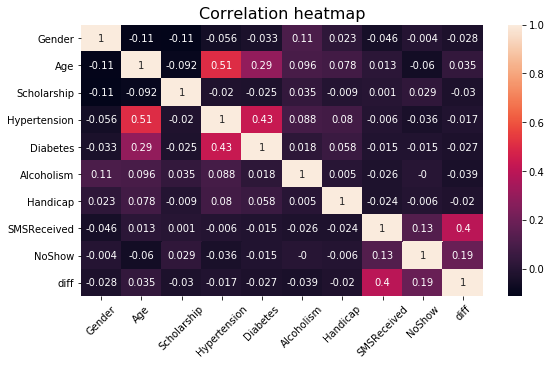

In [41]:
# zero_one function to convert a column with 2 values to zeros and ones
def zero_one(data, column):
    data[column].replace({data[column].unique()[0]:0, data[column].unique()[1]:1}, inplace=True)
    
# making a copy of the Dataframe for correlation heatmap 
df_corr = df.copy()

# Changing NoShow and Gender values to zeros and ones 
zero_one(df_corr, 'NoShow')
zero_one(df_corr, 'Gender')
#plotting correlation matrix

plt.figure(figsize=(9,5))
sns.heatmap(df_corr.corr().round(3), annot = True)
plt.title('Correlation heatmap', size='16')
plt.xticks(rotation='45');


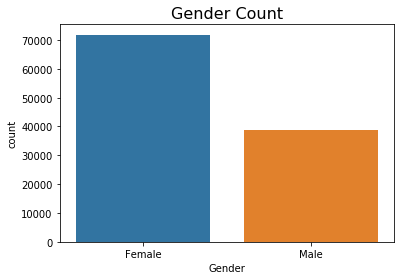

In [42]:
ax = sns.countplot(x=df.Gender, data=df)
ax.set_title("Gender Count", size='16')
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

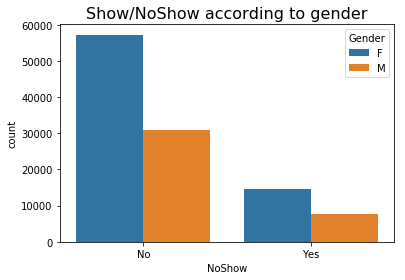

In [43]:
ax = sns.countplot(x=df.NoShow, hue=df.Gender, data=df)
ax.set_title("Show/NoShow according to gender", size='16')
plt.show()

## Question 2
> Does older age cause patients not to show up

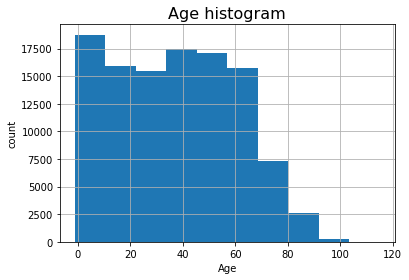

In [44]:
plt.figure()
df.Age.hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age histogram', size='16')
plt.show()

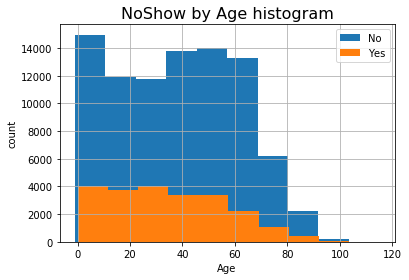

In [45]:
#plotting histogram of patients by NoShow.

plt.figure()
df.groupby(['NoShow']).Age.hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(df.NoShow.unique())
plt.title('NoShow by Age histogram', size='16')
plt.show()

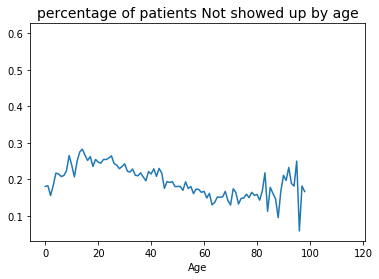

In [46]:
#plotting percentage of patients Not showed up by age

Age_ratio = df[df.NoShow == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size()
Age_ratio.plot()
plt.title('percentage of patients Not showed up by age', size='14')
plt.show()

# Summary
>Looking in the dataset we identified that the difference between appointment and schedule time as one of the correlated features to not showing to a medical appointment as well as SMS received. Gender and age; however, had no corelation with no show as the ratio between males and females were the same. Age had slight increase (as the age increases, the no shows increases), but it was not enough to conclude correlation between the two

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0